In [2]:
#pip install tensorflow_recommenders

Epoch 1/15
171/171 [==============================] - 2s 6ms/step - root_mean_squared_error: 3.9213 - loss: 15.3588 - regularization_loss: 0.0000e+00 - total_loss: 15.3588
Epoch 2/15
171/171 [==============================] - 1s 5ms/step - root_mean_squared_error: 3.8208 - loss: 14.5836 - regularization_loss: 0.0000e+00 - total_loss: 14.5836
Epoch 3/15
171/171 [==============================] - 1s 5ms/step - root_mean_squared_error: 3.7158 - loss: 13.7879 - regularization_loss: 0.0000e+00 - total_loss: 13.7879
Epoch 4/15
171/171 [==============================] - 1s 5ms/step - root_mean_squared_error: 3.5656 - loss: 12.6971 - regularization_loss: 0.0000e+00 - total_loss: 12.6971
Epoch 5/15
171/171 [==============================] - 1s 5ms/step - root_mean_squared_error: 3.4641 - loss: 11.9885 - regularization_loss: 0.0000e+00 - total_loss: 11.9885
Epoch 6/15
171/171 [==============================] - 1s 5ms/step - root_mean_squared_error: 3.4076 - loss: 11.5990 - regularization_loss: 0

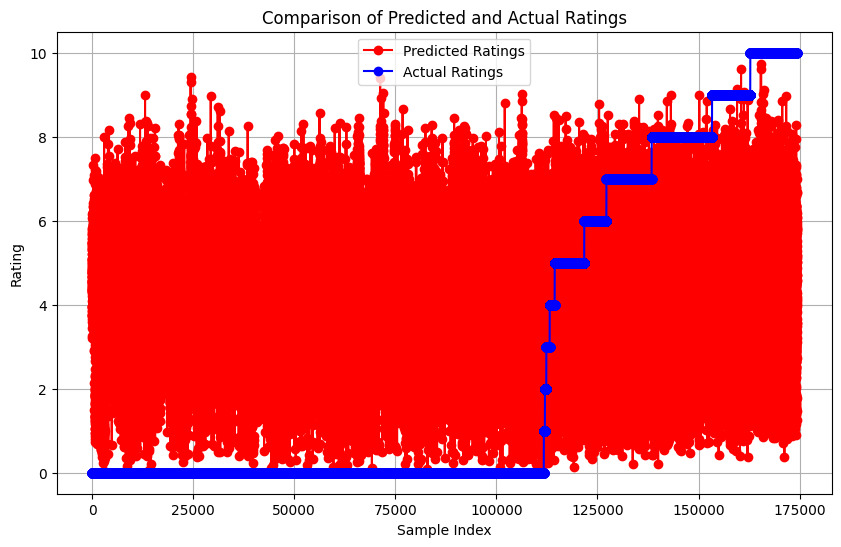

43/43 [==============================] - 0s 2ms/step
        predict_rating  actual_ranking
0             4.457068               8
1             6.112660               0
2             4.087132               0
3             4.495834               9
4             4.714613               0
...                ...             ...
174274        4.247519               0
174275        2.611015               0
174276        6.272126               0
174277        4.045634               8
174278        4.899282               0

[174279 rows x 2 columns]
사용자 USER_00000를 위한 상위 5개 권장 제품: 
b'Love That Dog'
b'The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2)'
b'The Lion, the Witch and the Wardrobe (rpkg) (Narnia)'
b'Danger Along the Ohio (An Avon Camelot Book)'
b'Matilda'
43/43 [==============================] - 0s 2ms/step
        predicted_rating  predicted_rating_ranking  real_rating_ranking
0               4.457068                     68484                20954
1             

In [4]:
import pre as pp
import model
import tensorflow as tf
import recommend
import plt
import retriveal
from result import calculate_ranking



# 데이터 불러오기 및 전처리
train, test, unique_user_ids, unique_book_titles = pp.load_data()

# BookRankingModel 클래스 초기화
ranking_model = model.BookRankingModel(unique_user_ids, unique_book_titles)
ranking_model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01))

cached_train = train.batch(4096).cache()
cached_test = test.batch(4096).cache()

# 모델 훈련
ranking_model.fit(cached_train , epochs=15)

# 모델 평가
ranking_model.evaluate(cached_test)

# 시각화
plt.plot_predicted_vs_actual_ratings(ranking_model, cached_test)
result = recommend.get_predicted_actual_ratings(ranking_model, cached_test)
print(result)

recommend.get_top_5_recommendations(ranking_model, unique_user_ids, unique_book_titles, test, 'USER_00000')

# ranking_model과 cached_test는 미리 정의되어 있다고 가정합니다.
result2 = calculate_ranking(ranking_model, cached_test)
print(result2)
